# Цель лабораторной работы

Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей

# Задание

1. Выбрать набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделить выборку на обучающую и тестовую.
3. Обучить модель k-ближайших соседей для произвольно заданного гиперпараметра K. Оценить качество модели с помощью подходящих для задачи метрик.
4. Построить модель и оценить качество модели с использованием кросс-валидации.
5. Произвести подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

# Ход выполнения лабораторной работы

Подключим необходимые библиотеки и загрузим набор данных

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)

# Загружаем данные
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.shape

(16719, 16)

In [44]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [45]:
data = data.dropna()
data.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [46]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [47]:
data.shape

(6825, 16)

Как видим, пустых значений больше нет, значет нет необходимости преобразовывать набор данных

Разделим данные на целевой столбец и признаки

In [ ]:
Но сначала сделаем, кодирование категориальных признаков.

In [48]:
le1 = LabelEncoder()
data['Name'] = le1.fit_transform(data['Name']);

In [49]:
le2 = LabelEncoder()
data['Platform'] = le2.fit_transform(data['Platform']);

In [50]:
le3 = LabelEncoder()
data['Genre'] = le3.fit_transform(data['Genre']);

In [51]:
le4 = LabelEncoder()
data['Publisher'] = le4.fit_transform(data['Publisher']);

In [52]:
le5 = LabelEncoder()
data['Developer'] = le5.fit_transform(data['Developer']);

In [53]:
le6 = LabelEncoder()
data['Rating'] = le6.fit_transform(data['Rating']);

In [54]:
X = data.drop("Name", axis=1)
Y = data["Name"]
print(X, "\n")
print(Y)

       Platform  Year_of_Release  Genre  Publisher  NA_Sales  \
0            12           2006.0     10        160     41.36   
2            12           2008.0      6        160     15.68   
3            12           2009.0     10        160     15.61   
6             2           2006.0      4        160     11.28   
7            12           2006.0      3        160     13.96   
...         ...              ...    ...        ...       ...   
16667         3           2001.0      0        158      0.01   
16677         3           2002.0      2        146      0.01   
16696         5           2014.0      0        123      0.00   
16700         5           2011.0      8         53      0.01   
16706         5           2011.0     11        240      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0         28.96      3.77         8.45         82.53          76.0   
2         12.76      3.79         3.29         35.52          82.0   
3         10.93      

In [55]:
X.shape

(6825, 15)

In [56]:
Y.shape

(6825,)

#### С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [58]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (5118, 15)
X_test: (1707, 15)
Y_train: (5118,)
Y_test: (1707,)


#### Обучим модель k-ближайших соседей для произвольно заданного гиперпараметра K

In [59]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.05744431418522861, 0.008201523140011716)

#### Построим модель и оценим качество модели с использованием кросс-валидации

In [77]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [64]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.09230769, 0.10417582, 0.08483516])

In [65]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.09377289377289377

#### Произведем подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [74]:
# Список настраиваемых параметров
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [72]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


CPU times: user 32.8 s, sys: 386 ms, total: 33.1 s
Wall time: 33.2 s


{'n_neighbors': 1}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

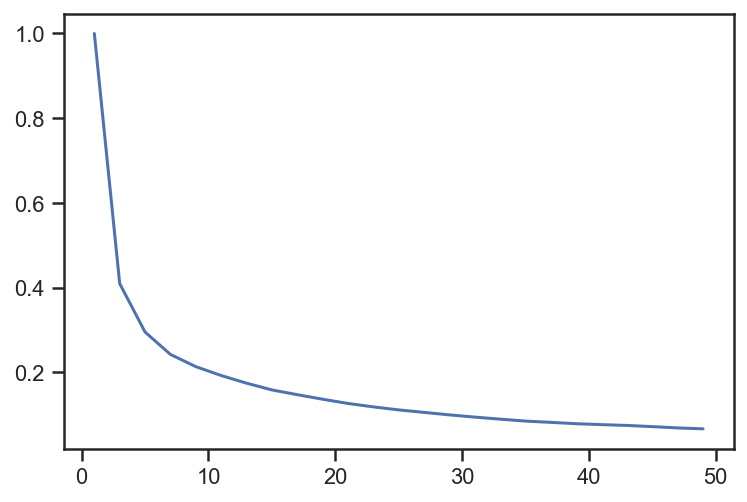

In [75]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

Очевидно, что для $K=1$ на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность.

Посмотрим на тестовом наборе данных

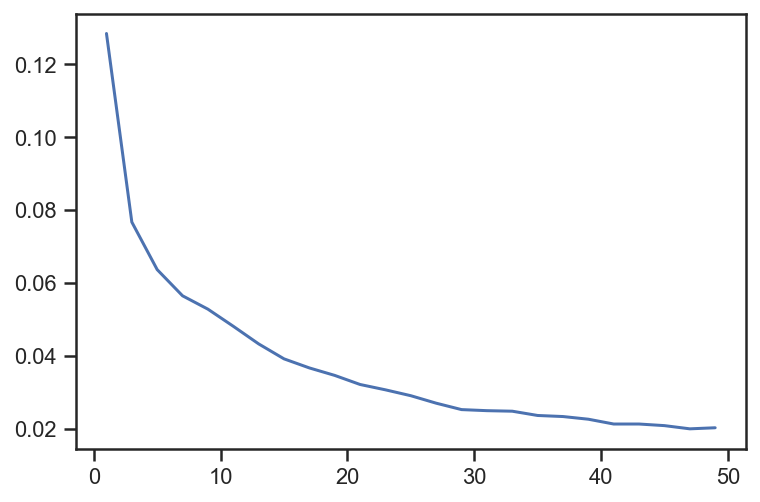

In [78]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Проверим получившуюся модель:

In [79]:
cl1_2 = KNeighborsClassifier(**clf_gs.best_params_)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(1.0, 0.09607498535442296)

Как видим, точность модели улучшилось